In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import os
import seaborn as sns
from collections import defaultdict

In [2]:
OUR_MODEL = 'MpraNet'

plt.rcParams["image.cmap"] = "Dark2"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

# color map dictionary
cmap = matplotlib.cm.get_cmap('Dark2')
acc = matplotlib.cm.get_cmap('Accent')
pair = matplotlib.cm.get_cmap('Paired')

COL = {
    OUR_MODEL: cmap(0),
    'GenoCanyon': cmap(1),
    'FIRE': cmap(2),
    'FunSeq2': cmap(3),
    'FitCons2': cmap(4),
    'CADD': cmap(5),
    'LINSIGHT': cmap(6),
    'FATHMM-MKL': pair(4)
}


In [7]:
home_dir = Path('C:/Users/fredl/projects/MpraScreen/analysis')

## Model performance

In [8]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve

In [10]:
tab = pd.read_csv(home_dir / 'score_comparison.csv')
tab.sort_values('test_auc', ascending=False).head(10)

,scores,test_auc,test_aupr
0,mpra_screen,0.871641,0.464761
53,FIRE_PHRED,0.830763,0.305019
52,FIRE,0.830756,0.304828
7,H3K9ac-E116,0.761873,0.286195
2,H3K27ac-E116,0.760342,0.272137
4,H3K36me3-E116,0.759484,0.207372
5,H3K4me1-E116,0.735363,0.200075
56,LINSIGHT,0.731932,0.173351
51,GenoCanyon_PHRED,0.731831,0.272755
50,GenoCanyon,0.731831,0.272754


In [11]:
scores = pd.read_csv(home_dir / 'all_scores_nn_preds_gnom_mpra_mixed.csv')
scores.head(5)

,chr,pos,Label,mpra_screen,DNase-E116,H3K27ac-E116,H3K27me3-E116,H3K36me3-E116,H3K4me1-E116,H3K4me3-E116,...,CScape_PHRED,DVAR,DVAR_PHRED,FitCons2,FitCons2_PHRED,ncER,ncER_PHRED,PAFA,PAFA_PHRED,GenoNet-E116
0,21,32926897,1,0.105153,3.04,2.583810,0.920000,0.385238,4.002380,1.220000,...,7.034900,0.9685,14.0389,0.167544,12.3532,93.8264,12.1394,0.697,7.7727,NaN
1,17,43688249,1,0.052565,0.31,0.241429,0.410000,0.271429,0.239048,0.243333,...,0.616900,0.2772,1.4934,0.053189,3.5470,84.9989,8.2836,-0.728,0.5176,NaN
2,10,74903148,1,0.146582,0.36,0.262857,0.264286,1.643330,0.281905,0.255714,...,4.152867,0.7622,6.1728,0.115940,7.3651,91.9692,10.9972,-0.839,0.4314,NaN
3,1,25760920,1,0.154204,0.80,1.752380,0.305714,0.601905,3.834290,0.438571,...,2.324833,0.9121,10.1993,0.134608,9.8105,45.0544,2.6455,0.814,8.8413,NaN
4,16,69227616,1,0.102860,0.56,0.450476,0.517619,0.578571,1.180000,0.335714,...,7.243267,0.8074,7.0475,0.134608,9.8105,18.9853,0.9592,0.216,4.4912,NaN


<Figure size 432x288 with 0 Axes>

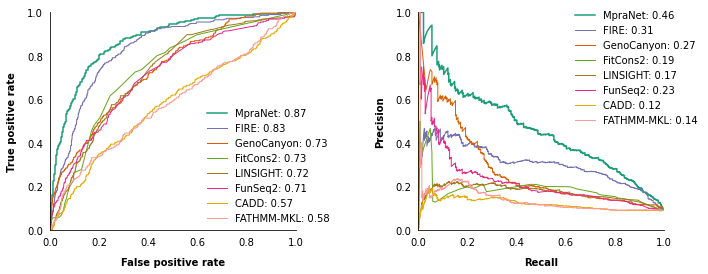

In [63]:
# SCORES = ['NN_neighbors', 'DNase-E116', 'H3K27ac-E116', 'H3K27me3-E116',
#           'H3K36me3-E116', 'H3K4me1-E116', 'H3K4me3-E116', 'H3K9ac-E116', 'H3K9me3-E116',
#           'Eigen-PC-phred', 'CADD_PHRED', 'DANN_PHRED', 'FATHMM-MKL_PHRED', 'FunSeq2_PHRED', 
#           'GenoCanyon_PHRED', 'FIRE_PHRED', 'ReMM_PHRED', 'LINSIGHT_PHRED', 'fitCons_PHRED',
#           'FATHMM-XF_PHRED', 'CScape_PHRED', 'DVAR_PHRED', 'FitCons2_PHRED', 'ncER_PHRED',
#           'PAFA_PHRED']

# SCORES = ['NN_neighbors', 'CADD_PHRED', 'DANN_PHRED', 'FATHMM-MKL_PHRED', 'FunSeq2_PHRED', 
#           'GenoCanyon_PHRED', 'FIRE_PHRED', 'ReMM_PHRED', 'LINSIGHT_PHRED', 'fitCons_PHRED',
#           'FATHMM-XF_PHRED', 'CScape_PHRED', 'DVAR_PHRED', 'FitCons2_PHRED', 'ncER_PHRED',
#           'PAFA_PHRED']
# SCORES = ['mpra_screen', 'GenoCanyon_PHRED', 'FunSeq2_PHRED', 'FitCons2_PHRED',
#           'FIRE_PHRED', 'CADD_PHRED', 'LINSIGHT_PHRED', 'FATHMM-MKL_PHRED']
SCORES = ['mpra_screen', 'FIRE_PHRED', 'GenoCanyon_PHRED', 'FitCons2_PHRED', 
          'LINSIGHT_PHRED', 'FunSeq2_PHRED', 'CADD_PHRED', 'FATHMM-MKL_PHRED']

plt.clf()
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(11, 4)

# left
for score in SCORES:
    score_name = score.replace('_PHRED', '')
    fpr, tpr, thr = roc_curve(scores.Label, scores[score])
    val = roc_auc_score(scores.Label, scores[score])

    if score == 'mpra_screen':
        score_name = OUR_MODEL
        ax[0].plot(fpr, tpr, label=f'{score_name}: {np.round(val, 2)}', linewidth=1.5, color=COL[score_name])
    else:
        ax[0].plot(fpr, tpr, label=f'{score_name}: {np.round(val, 2)}', linewidth=1, alpha=1, color=COL[score_name])

ax[0].set_xlim([0, 1])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('False positive rate', fontweight='bold', labelpad=10)
ax[0].set_ylabel('True positive rate', fontweight='bold', labelpad=10)
# ax[0].set_xlabel('False positive rate', labelpad=10)
# ax[0].set_ylabel('True positive rate', labelpad=10)
# ax[0].legend(bbox_to_anchor=(-0.85,1), loc="upper left", frameon=False)
ax[0].legend(bbox_to_anchor=(0.6,0.6), frameon=False)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].tick_params(axis='x', which='both', bottom=False, top=False)
ax[0].tick_params(which='both', left=False, right=False)

# right
for score in SCORES:
    score_name = score.replace('_PHRED', '')
    prec, recl, thr = precision_recall_curve(scores.Label, scores[score])
    val = average_precision_score(scores.Label, scores[score])
    
    if score == 'mpra_screen':
        score_name = OUR_MODEL
        ax[1].plot(recl, prec, label=f'{score_name}: {np.round(val, 2)}', linewidth=1.5, color=COL[score_name])
    else:
        ax[1].plot(recl, prec, label=f'{score_name}: {np.round(val, 2)}', linewidth=1, alpha=1, color=COL[score_name])

ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('Recall', fontweight='bold', labelpad=10)
ax[1].set_ylabel('Precision', fontweight='bold', labelpad=10)
# ax[1].set_xlabel('Recall', labelpad=10)
# ax[1].set_ylabel('Precision', labelpad=10)
# ax[1].legend(bbox_to_anchor=(1,1), loc="upper left", frameon=False)
ax[1].legend(bbox_to_anchor=(0.6,1.05), loc="upper left", frameon=False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].tick_params(axis='x', which='both', bottom=False, top=False)
ax[1].tick_params(which='both', left=False, right=False)
# ax[1].legend(title='Candidate SNVs tested', frameon=False)

plt.subplots_adjust(wspace=0.5)
plt.savefig(home_dir / 'method_comparison.png', dpi=200)

plt.show()

## Genome-wide precision/recall

In [57]:
# Total variants
N_VAR = 9254535
# N_VAR = 10000000

rec_df = pd.read_csv(home_dir / 'recall_results.csv')
rec_df.rename(columns={'recall_NN_neighbors': 'recall_mpra_screen'}, inplace=True)
rec_df = rec_df.sort_values('top_N_frac')
rec_df.head()

,recall_mpra_screen,recall_DNase-E116,recall_CADD_PHRED,recall_DANN_PHRED,recall_FATHMM-MKL_PHRED,recall_FunSeq2_PHRED,recall_GenoCanyon_PHRED,recall_FIRE_PHRED,recall_ReMM_PHRED,recall_LINSIGHT_PHRED,recall_fitCons_PHRED,recall_FitCons2_PHRED,top_N_frac
0,0.0,0.0,0.0,0.0,0.003226,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000010
1,0.0,0.0,0.0,0.0,0.003226,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000015
2,0.0,0.0,0.0,0.0,0.003226,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000020
3,0.0,0.0,0.0,0.0,0.003226,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000025
4,0.0,0.0,0.0,0.0,0.003226,0.003226,0.0,0.0,0.0,0.0,0.0,0.0,0.000030


In [58]:
dd = defaultdict(list)
for prevalence in [0.005, 0.01, 0.02]:
    for N_VALIDATE in [25000, 50000, 75000, 100000]:
        top_quantile = N_VALIDATE / N_VAR
        tmp = rec_df[np.abs(rec_df.top_N_frac - top_quantile) < 1e-6].iloc[0]
        prec = tmp['recall_mpra_screen'] * prevalence / top_quantile
        print(tmp['recall_mpra_screen'], prevalence, top_quantile)
        
        dd['prevalence'] += [prevalence]
        dd['n_validate'] += [N_VALIDATE]
        dd['precision'] += [prec]
        
df3 = pd.DataFrame(dd)

0.0967741935483871 0.005 0.0027013782972348153
0.16451612903225807 0.005 0.0054027565944696305
0.2258064516129032 0.005 0.008104134891704445
0.2709677419354839 0.005 0.010805513188939261
0.0967741935483871 0.01 0.0027013782972348153
0.16451612903225807 0.01 0.0054027565944696305
0.2258064516129032 0.01 0.008104134891704445
0.2709677419354839 0.01 0.010805513188939261
0.0967741935483871 0.02 0.0027013782972348153
0.16451612903225807 0.02 0.0054027565944696305
0.2258064516129032 0.02 0.008104134891704445
0.2709677419354839 0.02 0.010805513188939261


In [51]:
df3

,prevalence,n_validate,precision
0,0.005,25000,0.179120
1,0.005,50000,0.152252
2,0.005,75000,0.139316
3,0.005,100000,0.125384
4,0.010,25000,0.358240
5,0.010,50000,0.304504
6,0.010,75000,0.278631
7,0.010,100000,0.250768
8,0.020,25000,0.716480
9,0.020,50000,0.609008


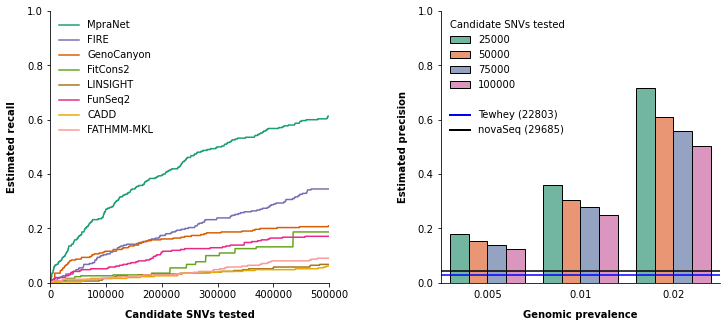

In [64]:
# to change default colormap
plt.rcParams["image.cmap"] = "Dark2"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 5)

# x-axis is recall (percent functional being detected), y-axis is detected positives (population size * p(pred +) )
x = rec_df['top_N_frac'] * N_VAR

for method in SCORES:
    y = rec_df[f'recall_{method}'].values
    
    if method == 'mpra_screen':
        name = OUR_MODEL
    else:
        name = method.replace('_PHRED', '')
    ax[0].plot(x, y, label=name, color=COL[name])

    
ax[0].set_xlim([0, 500000])
ax[0].set_ylim([0, 1])
ax[0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax[0].set_xlabel('Candidate SNVs tested', fontweight='bold', labelpad=10)
ax[0].set_ylabel('Estimated recall', fontweight='bold', labelpad=10)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
# ax[0].tick_params(axis='x', which='both', bottom=False, top=False)
# ax[0].tick_params(which='both', left=False, right=False)

ax[0].legend(frameon=False)

# right
df3['Candidate SNVs tested'] = df3['n_validate']
g = sns.barplot(x='prevalence', y='precision', hue='Candidate SNVs tested', data=df3, ax=ax[1], palette='Set2',
                linewidth=1, edgecolor='k')

# add MPRA experiment precisions
ax[1].axhline(678/22803, color='blue')
# ax[1].axhline(1684/29685, color='k')
ax[1].axhline(1280/29685, color='k')

ax[1].set_ylim([0, 1.0])
ax[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax[1].set_xlabel('Genomic prevalence', fontweight='bold', labelpad=10)
ax[1].set_ylabel('Estimated precision', fontweight='bold', labelpad=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].tick_params(axis='x', which='both', bottom=False, top=False)

# customize legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([], [], linestyle=''),
                Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='k', lw=2)]
cur_handles, cur_labels = ax[1].get_legend_handles_labels()
cur_handles += custom_lines
cur_labels += ['', 'Tewhey (22803)', 'novaSeq (29685)']

ax[1].legend(handles=cur_handles, labels=cur_labels, title='Candidate SNVs tested', frameon=False)

plt.subplots_adjust(wspace=0.4)
plt.savefig(home_dir / 'genome_analysis.png', dpi=200)
plt.show()

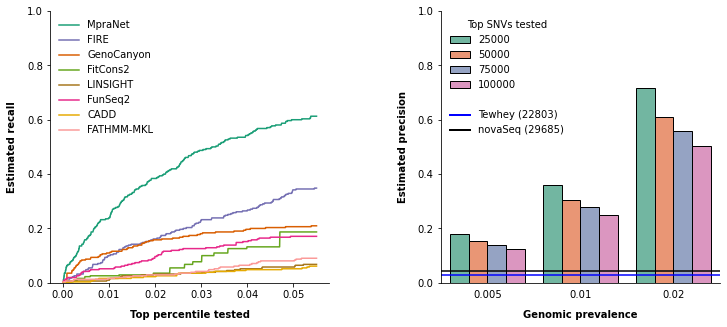

In [69]:
# to change default colormap
plt.rcParams["image.cmap"] = "Dark2"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 5)

# x-axis is recall (percent functional being detected), y-axis is detected positives (population size * p(pred +) )
x = rec_df['top_N_frac']

for method in SCORES:
    y = rec_df[f'recall_{method}'].values
    
    if method == 'mpra_screen':
        name = OUR_MODEL
    else:
        name = method.replace('_PHRED', '')
    ax[0].plot(x, y, label=name, color=COL[name])

    
# ax[0].set_xlim([0, 500000])
ax[0].set_ylim([0, 1])
ax[0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax[0].set_xlabel('Top percentile tested', fontweight='bold', labelpad=10)
ax[0].set_ylabel('Estimated recall', fontweight='bold', labelpad=10)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
# ax[0].tick_params(axis='x', which='both', bottom=False, top=False)
# ax[0].tick_params(which='both', left=False, right=False)

ax[0].legend(frameon=False)

# right
df3['Top percentile tested'] = df3['n_validate']
g = sns.barplot(x='prevalence', y='precision', hue='Top percentile tested', data=df3, ax=ax[1], palette='Set2',
                linewidth=1, edgecolor='k')

# add MPRA experiment precisions
ax[1].axhline(678/22803, color='blue')
# ax[1].axhline(1684/29685, color='k')
ax[1].axhline(1280/29685, color='k')

ax[1].set_ylim([0, 1.0])
ax[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax[1].set_xlabel('Genomic prevalence', fontweight='bold', labelpad=10)
ax[1].set_ylabel('Estimated precision', fontweight='bold', labelpad=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].tick_params(axis='x', which='both', bottom=False, top=False)

# customize legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([], [], linestyle=''),
                Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='k', lw=2)]
cur_handles, cur_labels = ax[1].get_legend_handles_labels()
cur_handles += custom_lines
cur_labels += ['', 'Tewhey (22803)', 'novaSeq (29685)']

ax[1].legend(handles=cur_handles, labels=cur_labels, title='Top SNVs tested', frameon=False)

plt.subplots_adjust(wspace=0.4)
plt.savefig(home_dir / 'genome_analysis.png', dpi=200)
plt.show()

## Sample size sim

In [70]:
res = pd.read_csv(home_dir / 'sample_size_sim.csv')
res

,n_train,test_AUC,test_APR,n_discovered,n_remaining,iter
0,3000,0.8287,0.3671,100,1260,0
1,4600,0.8360,0.3868,100,1160,1
2,6200,0.8387,0.3931,100,1060,2
3,7800,0.8462,0.4010,100,960,3
4,9400,0.8481,0.4094,100,860,4
5,11000,0.8512,0.4143,100,760,5
6,12600,0.8549,0.4249,100,660,6
7,14200,0.8564,0.4267,100,560,7
8,15800,0.8610,0.4384,100,460,8
9,17400,0.8629,0.4443,100,360,9


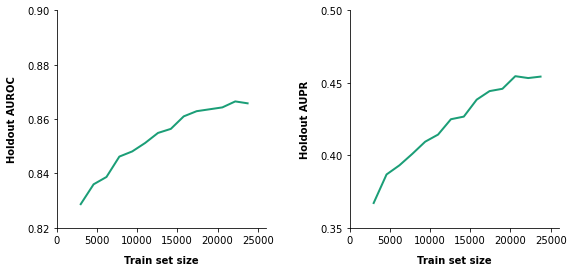

In [86]:
# plt.clf()
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(9, 4)

# left side
ax[0].plot(res.n_train, res.test_AUC, linewidth=2, color=COL['MpraNet'])
ax[0].set_ylim([0.82, 0.9])
ax[0].set_yticks([0.82, 0.84, 0.86, 0.88, 0.9])
ax[0].set_xlim([0, 26000])

ax[0].set_xlabel('Train set size', fontweight='bold', labelpad=10)
ax[0].set_ylabel('Holdout AUROC', fontweight='bold', labelpad=10)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# ax[0].text(3000, 0.97, 'Tewhey')
# ax[0].text(15000, 0.97, 'novaSeq')
# ax[0].axvspan(0, 10550, alpha=0.2, color='grey')
# ax[0].axvline(10847, color='gold', linewidth=2)

# right side
ax[1].plot(res.n_train, res.test_APR, linewidth=2, color=COL['MpraNet'])
ax[1].set_ylim([0.35, 0.5])
ax[1].set_yticks([0.35, 0.4, 0.45, 0.5])
ax[1].set_xlim([0, 26000])

ax[1].set_xlabel('Train set size', fontweight='bold', labelpad=10)
ax[1].set_ylabel('Holdout AUPR', fontweight='bold', labelpad=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# ax[1].text(3000, 0.62, 'Tewhey')
# ax[1].text(15000, 0.62, 'novaSeq')
# ax[1].axvspan(0, 10550, alpha=0.2, color='grey')
# ax[1].axvline(10847, color='gold', linewidth=2)

plt.subplots_adjust(wspace=0.4)
plt.savefig(home_dir / 'train_simulation.png', dpi=200)
plt.show()